In [4]:
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
img= io.imread('iu.jpg')

red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:, 2]

Populating the interactive namespace from numpy and matplotlib


In [2]:
red


Array([[  4,   4,   3, ...,  45,  44,  44],
       [  4,   4,   3, ...,  45,  45,  45],
       [  4,   4,   3, ...,  46,  46,  46],
       ...,
       [165, 168, 169, ...,  45,  44,  43],
       [164, 167, 169, ...,  44,  42,  41],
       [164, 167, 169, ...,  43,  41,  39]], dtype=uint8)

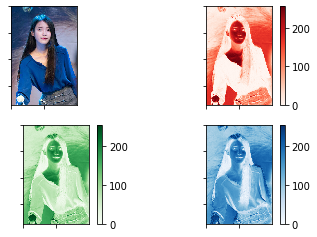

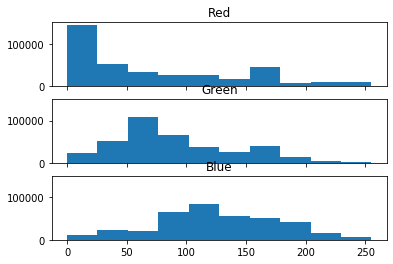

In [5]:
# Plot
fig, axs = plt.subplots(2,2)

cax_00 = axs[0,0].imshow(img)
axs[0,0].xaxis.set_major_formatter(plt.NullFormatter())  # kill xlabels
axs[0,0].yaxis.set_major_formatter(plt.NullFormatter())  # kill ylabels

cax_01 = axs[0,1].imshow(red, cmap='Reds')
fig.colorbar(cax_01, ax=axs[0,1])
axs[0,1].xaxis.set_major_formatter(plt.NullFormatter())
axs[0,1].yaxis.set_major_formatter(plt.NullFormatter())

cax_10 = axs[1,0].imshow(green, cmap='Greens')
fig.colorbar(cax_10, ax=axs[1,0])
axs[1,0].xaxis.set_major_formatter(plt.NullFormatter())
axs[1,0].yaxis.set_major_formatter(plt.NullFormatter())

cax_11 = axs[1,1].imshow(blue, cmap='Blues')
fig.colorbar(cax_11, ax=axs[1,1])
axs[1,1].xaxis.set_major_formatter(plt.NullFormatter())
axs[1,1].yaxis.set_major_formatter(plt.NullFormatter())
plt.show()

# Plot histograms
fig, axs = plt.subplots(3, sharex=True, sharey=True)

axs[0].hist(red.ravel(), bins=10)
axs[0].set_title('Red')
axs[1].hist(green.ravel(), bins=10)
axs[1].set_title('Green')
axs[2].hist(blue.ravel(), bins=10)
axs[2].set_title('Blue')

plt.show()

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2


In [ ]:
data.astronaut()


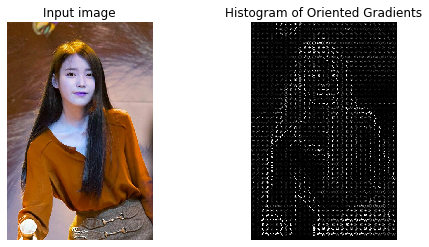

In [7]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = cv2.imread('iu.jpg');

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

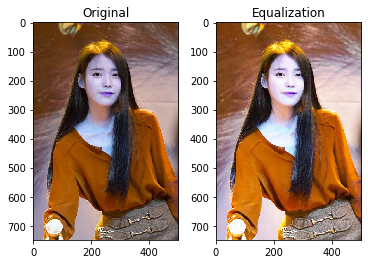

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('iu.jpg');

hist, bins = np.histogram(img.flatten(), 256,[0,256])

cdf = hist.cumsum()

# cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
# mask처리가 되면 Numpy 계산에서 제외가 됨
# 아래는 cdf array에서 값이 0인 부분을 mask처리함
cdf_m = np.ma.masked_equal(cdf,0)

#History Equalization 공식
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(img2),plt.title('Equalization')
plt.show()